In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# Describe method show us the prespective statistics for numeric value.

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Here 25% and 75% are the percentile value of respctive columns,
# 50% is eual to mean value.

In [ ]:
# Now to see obejct data columns we include "0" in describe parenthese column.

In [6]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [ ]:
# Here freq is how many time that word repeat and top mean most occurs word.

In [ ]:
# Here in sex column male word repeat 676 time.

In [ ]:
# for unique value in region column.

In [7]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
# start data cleaning.

In [ ]:
# Find null value

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# there is no null value present in the columns.

In [9]:
df.duplicated().sum()

1

In [ ]:
# check for duplicate value.

In [4]:
df[df.duplicated(keep="first")]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
# now we want to drop this duplicated row.

In [5]:
df.drop_duplicates(keep='first',inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# one row is remove.

In [ ]:
# Now we will split age into age group.

In [ ]:
# Teenagers- 0 to 14
#Adults- 15 to 24
# old adult- 25 to 60 
#Elderly-above 60

In [57]:
df["Age_Group"] = pd.cut(df["age"], bins = [0,14,24,60, np.inf], labels = ["Teenagers", "Adults", "Old Adults", "Elderly"])
df.head(5)

,age,sex,bmi,children,smoker,region,charges,BMI_categories,Age_Group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Adults
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Adults
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Old Adults
3,33,male,22.705,0,no,northwest,21984.47061,Normal,Old Adults
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Old Adults


In [ ]:
# similarly we will split bmi into different category.

In [58]:
df["BMI_categories"] = pd.cut(df["bmi"], bins = [0, 18.5, 24.9, 29.9, np.inf], labels = ["Underweight", "Normal", "Overweight", "Obese"])
df.head()

,age,sex,bmi,children,smoker,region,charges,BMI_categories,Age_Group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Adults
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Adults
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Old Adults
3,33,male,22.705,0,no,northwest,21984.47061,Normal,Old Adults
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,Old Adults


### Data visulization.

In [52]:
def bar_perc(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        plot.annotate(percentage, (x, y), size = 12) # annotate the percentage

### what is common age of customer?

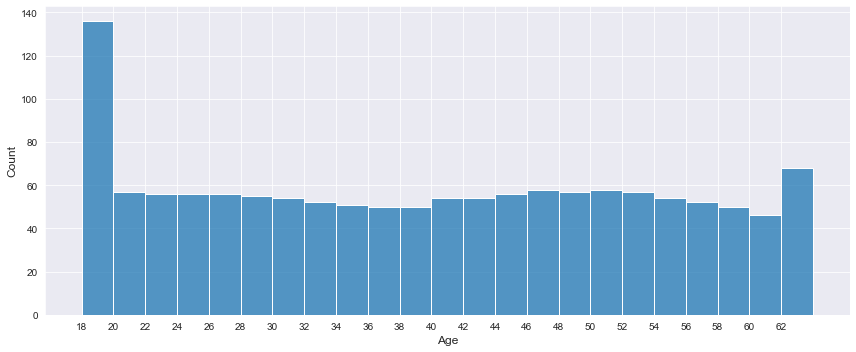

In [105]:
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)

sns.histplot(df, x='age', binwidth=2)

bins = np.arange(df['age'].min(), df['age'].max(), 2)
plt.xticks(bins)
plt.xlabel('Age',size=12)
plt.ylabel('Count',size=12)
plt.show()

### Observation: The common age of customer is between 18-19.

### BMI_categories according to Age_Group

Text(0, 0.5, 'Count')

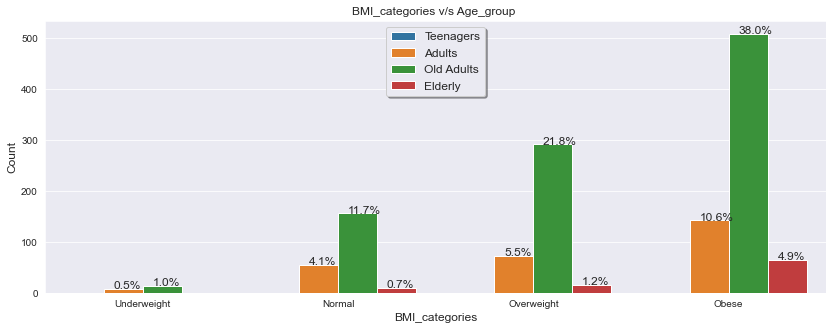

In [106]:
plt.figure(figsize=(14,5))
ax=sns.countplot(x="BMI_categories",hue='Age_Group',data=df)
bar_perc(ax,df['BMI_categories'])
ax.set(title="BMI_categories v/s Age_group ")
plt.legend(loc='upper center', shadow=True, fontsize=12)
plt.xlabel('BMI_categories',size=12)
plt.ylabel('Count',size=12)

### Observation: Most customers fall into obese categories of BMI

### How Many Customers are Male and Female.

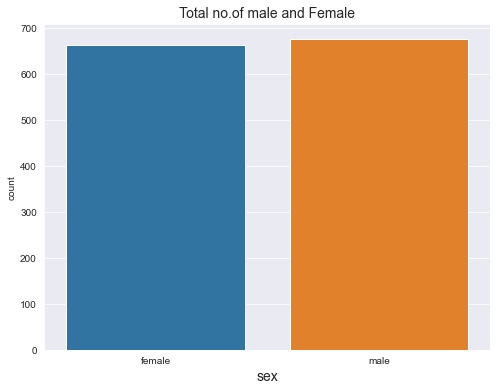

In [13]:
plt.figure(figsize=(8,6))
plt.title("Total no.of male and Female",size=14)
plt.xlabel("sex",size=14)
sns.countplot(x="sex",data=df)
plt.show()

### Observation: Male customer and female customer are almost same.

### No.of children per customer.

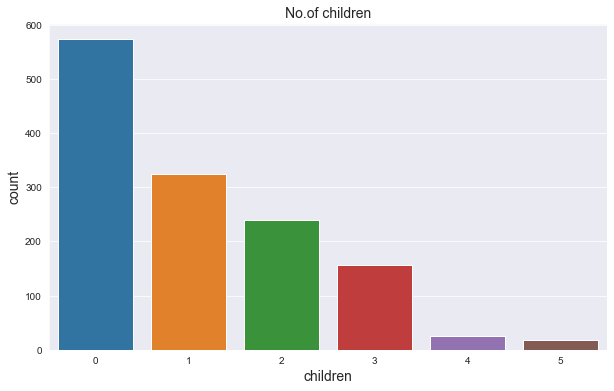

In [112]:
plt.figure(figsize=(10,6))
plt.title("No.of children",fontsize=14)
plt.xlabel("Children",size=14)
plt.ylabel("Count",size=14)
sns.countplot(x="children",data=df)
plt.show()

### Observation:Majority customers have no children.

### How many customer are  non-smoker?

Text(0, 0.5, 'Count')

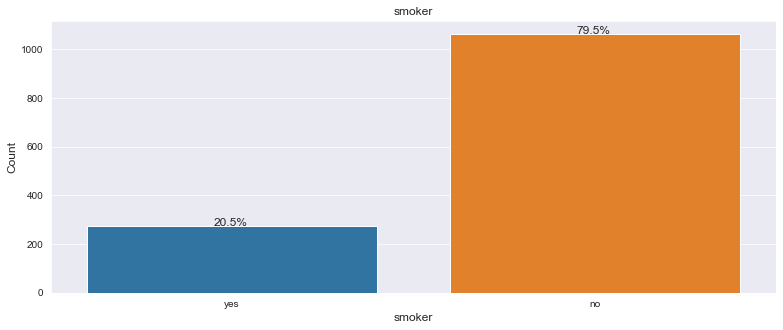

In [113]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x="smoker",data=df)
bar_perc(ax,df['smoker'])
ax.set(title="smoker")
plt.xlabel('smoker',size=12)
plt.ylabel('Count',size=12)

### Observation: Aroud 79.5 customers are non-smokers

### Customers distribution accroding to region wise

C:\Users\patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


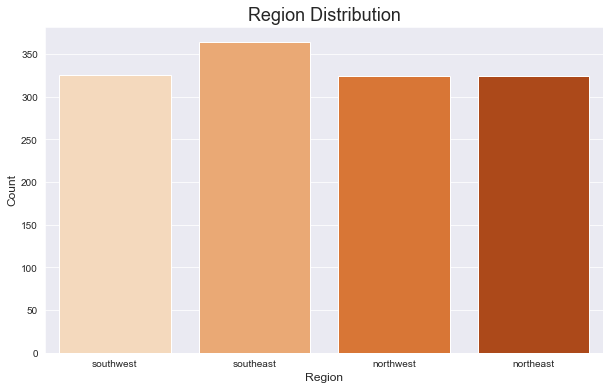

In [17]:
plt.figure(figsize = (10,6))
sns.countplot(df.region,palette='Oranges')
plt.title('Region Distribution',size=18)
plt.xlabel('Region',size=12)
plt.ylabel('Count',size=12)
plt.show()

### The number of customers from the southeast is slightly more than others.

### which type customer have higher number no.of smokers male or female?

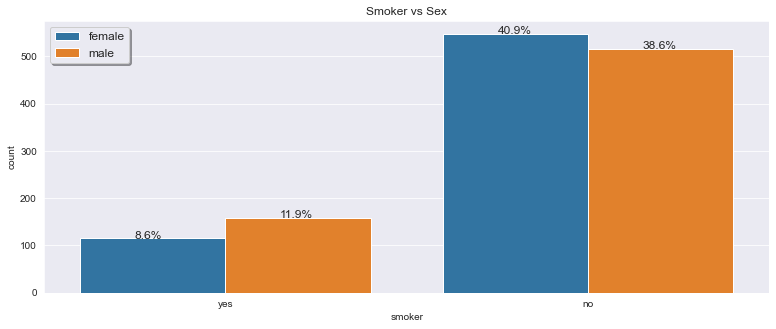

In [97]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='smoker',hue='sex',data=df)
bar_perc(ax,df['sex'])
ax.set(title="Smoker vs Sex")
plt.legend(loc="upper left", fontsize=12, shadow=True)

### obsevation: male customer

### Sex distribution accroding to region

Text(0, 0.5, 'Count')

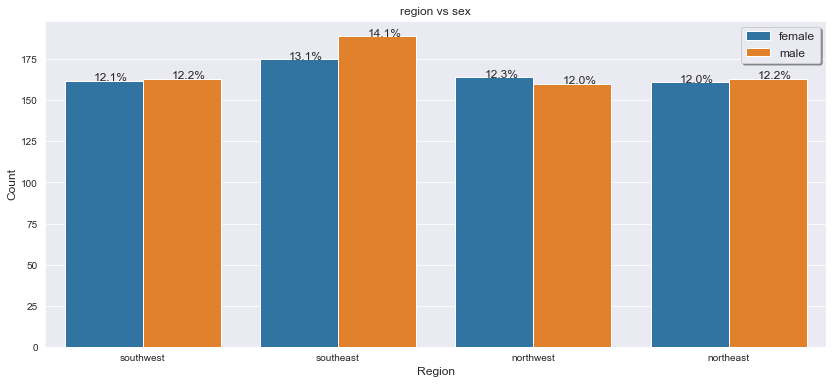

In [114]:
plt.figure(figsize=(14,6))
ax=sns.countplot(x='region',hue='sex',data=df)
bar_perc(ax,df['region'])
ax.set(title="region vs sex")
plt.legend(loc="best",fontsize=12, shadow=True)
plt.xlabel('Region',size=12)
plt.ylabel('Count',size=12)

### Southeast have highest male and female.

### Show BMI distribution according to region

Text(0, 0.5, 'Count')

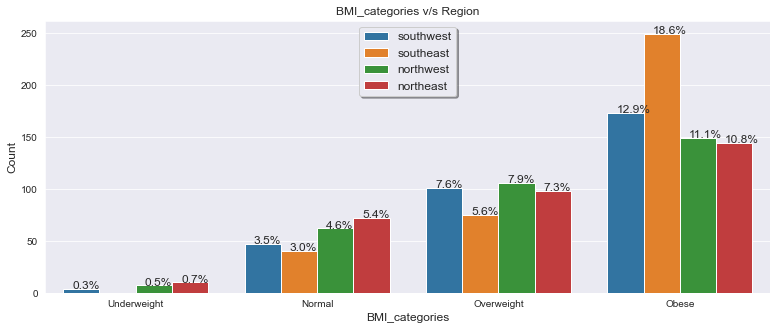

In [115]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='BMI_categories',hue='region',data=df)
bar_perc(ax,df['BMI_categories'])
ax.set(title="BMI_categories v/s Region")
plt.legend(loc="upper center", shadow=True, fontsize=12)
plt.xlabel('BMI_categories',size=12)
plt.ylabel('Count',size=12)

### Obervation: southeast region have higest customers in obeses categories

### Charge distribution according to sex and age

C:\Users\patel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


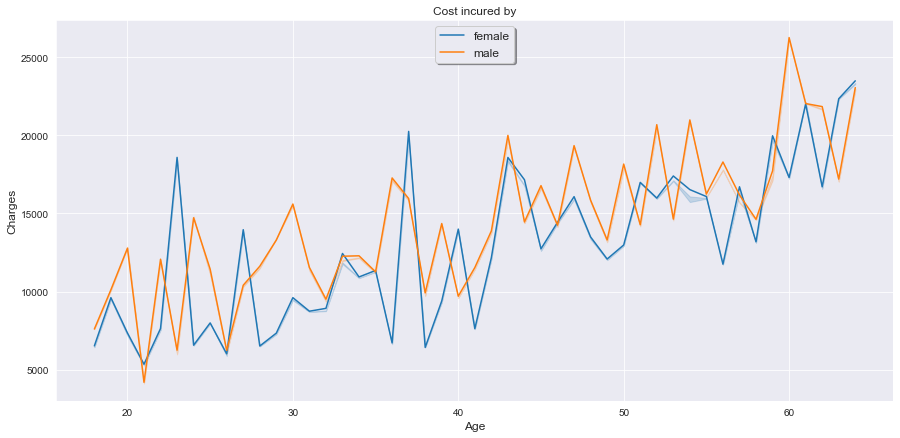

In [116]:
plt.figure(figsize=(15,7))
sns.lineplot(df["age"],df["charges"],hue=df["sex"],ci=1).set(title= 'Cost incured by')
plt.legend(loc="upper center", fontsize=12, shadow=True)
plt.xlabel('Age',size=12)
plt.ylabel('Charges',size=12)
plt.show()

###  Charges according to BMI_categories

Text(0, 0.5, 'Charges')

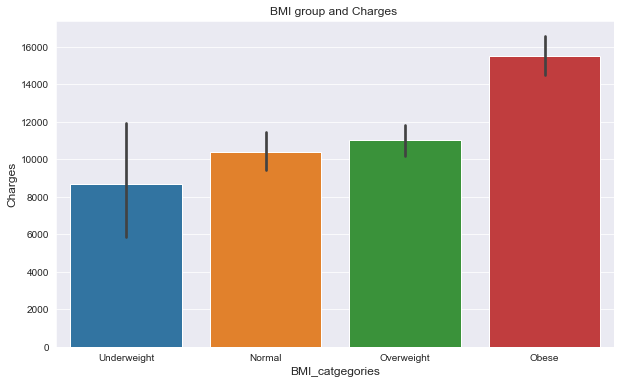

In [117]:
plt.figure(figsize=(10,6))
sns.barplot(x='BMI_categories',y='charges',data=df).set(title="BMI group and Charges " )
plt.xlabel('BMI_catgegories',size=12)
plt.ylabel('Charges',size=12)

### Observation: obese category have highest charge for insurance

### Charges accoding to area.

Text(0, 0.5, 'Charges')

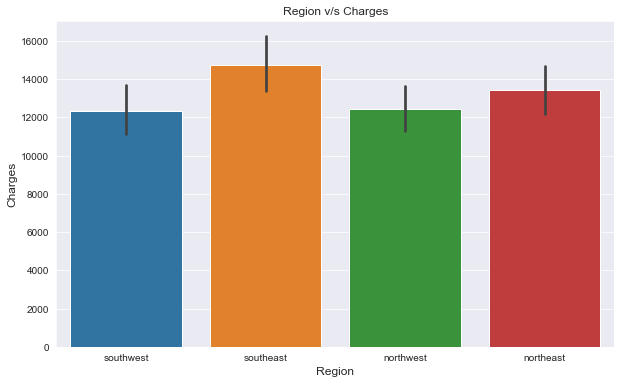

In [118]:
plt.figure(figsize=(10,6))
sns.barplot(x='region',y='charges',data=df).set(title="Region v/s Charges")
plt.xlabel('Region',size=12)
plt.ylabel('Charges',size=12)

### Observation:south east customers have higher charges.

### Charges according to smoker categories

Text(0, 0.5, 'Charges')

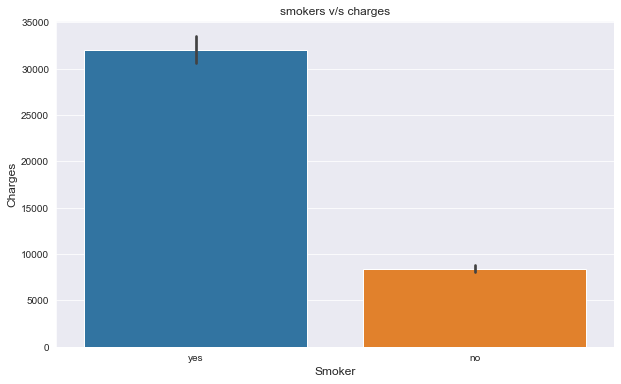

In [119]:
plt.figure(figsize=(10,6))
sns.barplot(x='smoker',y='charges',data=df).set(title="smokers v/s charges")
plt.xlabel('Smoker',size=12)
plt.ylabel('Charges',size=12)

### observation: smoker have highest charges

### Charges accoding to no.of children.

Text(0, 0.5, 'Charges')

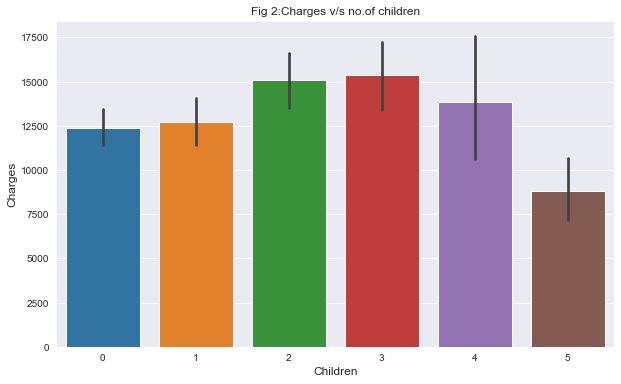

In [120]:
plt.figure(figsize=(10,6))
sns.barplot(x='children',y='charges',data=df).set(title="Fig 2:Charges v/s no.of children")
plt.xlabel('Children',size=12)
plt.ylabel('Charges',size=12)

### Observation: customer have 3 children have more charges

### smoker distribution in region-wise

Text(0, 0.5, 'Count')

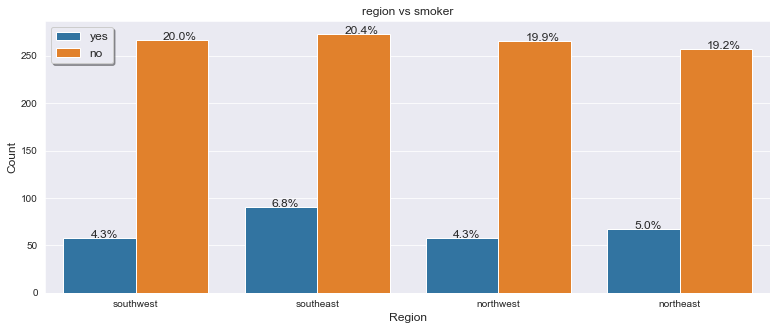

In [121]:
plt.figure(figsize=(13,5))
ax=sns.countplot(x='region',hue='smoker',data=df)
bar_perc(ax,df['region'])
ax.set(title="region vs smoker")
plt.legend(shadow=True, fontsize=12)
plt.xlabel('Region',size=12)
plt.ylabel('Count',size=12)

### southeast region have highest smokers